<a href="https://colab.research.google.com/github/Angelo254/Machine-Learning-From-A-Titanic-Disaster/blob/master/The_Titanic_Moringa_Data_Science_Core_W9_Independent_Project_2021_10_Angelo_Sang_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning From a Disaster(Titanic)

## Business Understanding



RMS Titanic was a British passenger liner operated by the White Star Line,
that sank in the North Atlantic Ocean in the early morning hours of April 15, 1912.
The Titanic struck an iceberg during her maiden voyage from Southampton to New York City. 
Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, 
making the sinking one of modern history's deadliest peacetime commercial marine disasters. 

## Specifying the Data Analytic Question

Use machine learning to creat a model that predicts which passengers survived the Titanic shipwreck.

## Defining the Metric for Success

1) We identify the most important features for predicting the chances of survival.

2) The model achieves atleast 80% accuracy.

3) The confusion matrix has the lowest possible false positive and false negatives.

## Data Understanding

### Variable Descriptions

* Pclass - passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survival - Survival (0 = No; 1 = Yes)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare (British pound)
* cabin - Cabin 
* embarked - Port of Embarkation (c = Cherbourg; Q = Queens town; S = Southampton)

### Recording the Experimental Design

* The project was undertaken using the following design Datasets(titanic.csv).
* Exploratory Data Analysis.
* Data Cleaning.
* External Data Source Validation.
* Univariate Analysis.
* Bivariate Analysis.
* Multivariate Analysis.
* Modelling: KNN(K- Nearest Neighbor), Naive Bayes.
* Challenging the solution: Modelling using the first 5 principal Components.
* Follow up questions.
* Conclusion.

### Data Relevance

* How accurate is the data at predicting whether a passenger survived or not?
* Was the dataset sufficient?
* Was the data biased?
* Is the data source a reliable source?

### Importing the libraries

In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading the Data

In [243]:
# Loading the data from the source
# Dataset source = train.csv
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### Checking the Data

In [244]:
# Previewing the train dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
# Previewing the tail
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [246]:
# previewing the test dataset
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [247]:
# previewing the tail
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


The train dataset has the dependent variable we want to predict (survived) plus other independent variables such as Name, sex and age.

We will use the train data to train our model. The test dataset has the same independent variables as the train data but does not contain the dependent variable (survived). 

The test data helps us evaluate how well our model performs on unseen data.

In [248]:
# Determining the number of records in our dataset
df_train.shape

(891, 12)

In [249]:
# obtaining more information about our data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Description

#### describing the features
## Categorical features
* Nominal: Cabin,Embarked - more than one category, but not ordered
* Dichotonomous: sex - has only two possible outcomes
* Ordinal:  Pclass - more than one category, but has an intristic order

## Numerical features
* Discrete: Passenger_ID,SibSp,Parch,Survived
* Continuous: Age, Fare

## Cleaning the Dataset

In [250]:
# Identifying the null values
df_train.isnull().sum().sum()

866

In [251]:
# checking for null values per column
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [252]:
# checking for nunique values in Passenger_Id and Ticket
print(df_train.PassengerId.nunique())
print(df_train.Ticket.nunique())

891
681


The ['PassengerId','Ticket'] columns will not be useful for analysis since they have very high dimensionality (too many unique values) thus, we drop them.

In [253]:
# creating a copy and dropping unnecesary colums
df_train1 = df_train.drop(['PassengerId','Ticket'], axis = 1)
df_train1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### Age Column: Replacing the missing values with the mean.

In [254]:
# Dealing with the missing data.
# the age column has 177 missing values.
# replacing the missing values with the mean.
# creating a copy

df_train2 = df_train1
df_train2['Age']= df_train2['Age'].fillna(df_train2['Age'].mean(),axis=0)

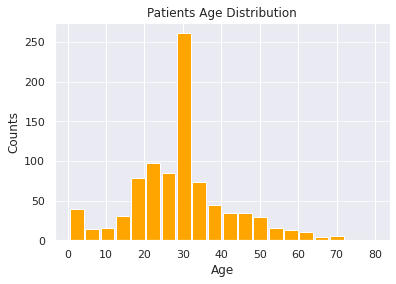

In [255]:
# visualizing age distribution
size, scale = 1000,10
age = df_train2['Age']

age.hist(grid=True, bins=20, rwidth=0.9,color='orange')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y',alpha=0.75)

Using the mean to replace missing values in the Age column results in a normally distributed LEPTOKURTIC curve.

### Cabin Column

In [256]:
# The cabin column has 687 missing values.
# we will use the fare column to impute the missing values
# creating a copy

df_train3 = df_train2
df_train3.Cabin.isnull().sum()
df_train3.Cabin.nunique()

147

In [257]:
df_train3.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
B102                 0.0000
B94                  0.0000
A36                  0.0000
F G63                7.6500
F G73                7.6500
                     ...   
B58 B60            247.5208
B51 B53 B55        258.6646
B57 B59 B63 B66    262.3750
C23 C25 C27        263.0000
B101               512.3292
Name: Fare, Length: 147, dtype: float64

In [258]:
# There are too many unique values but we can group the cabins using the first letter of the cabin
# creating a copy
df_train4 = df_train3

# Assigning the null values to z
df_train4.Cabin.fillna('z',inplace=True)

df_train4.Cabin =[i[0]for i in df_train4.Cabin]

In [259]:
# using the first letter gives the major cabin partitions
# we then obtain the average fares based on each partition
# partition G has the lowest mean value meaning that was the cheapest Cabin Partition and Partition B has the highest mean value meaning that was the most expensive Cabin partition.

df_train4.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
G     13.581250
F     18.696792
z     19.157325
T     35.500000
A     39.623887
E     46.026694
D     57.244576
C    100.151341
B    113.505764
Name: Fare, dtype: float64

In [260]:
# create a function to impute the cabin values using the fare column(Pounds)

def cabin_fxn(i):

  # initializing as 0
  a = 0
  if i<14:
    a = 'G'
  elif i >= 14 and i < 19:
    a ='F'
  elif i >= 19 and i < 20:
    a = 'N'
  elif i >= 20 and i < 35:
    a = 'T'
  elif i >= 35 and i < 40:
    a = 'A'
  elif i >= 40 and i < 46:
    a = 'E'
  elif  i >= 47 and i < 57:
    a = 'D'
  elif i >= 58 and i < 100:
    a = 'C'
  else:
    a = 'B'
  return a

In [261]:
df_train4.Cabin.isnull().sum()

0

### Embarked Column

In [262]:
# The embarked column haas two missing values
# viewing the 2 missing values.
# we then look at other independent variables that may help us determine the correct value for the Embarked column

df_train4[df_train4.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B,NaN


Similarities between the two rows with null values on the embarked column
* survived column
* P class 1
* Female

Text(0.5, 1.0, 'Test Set')

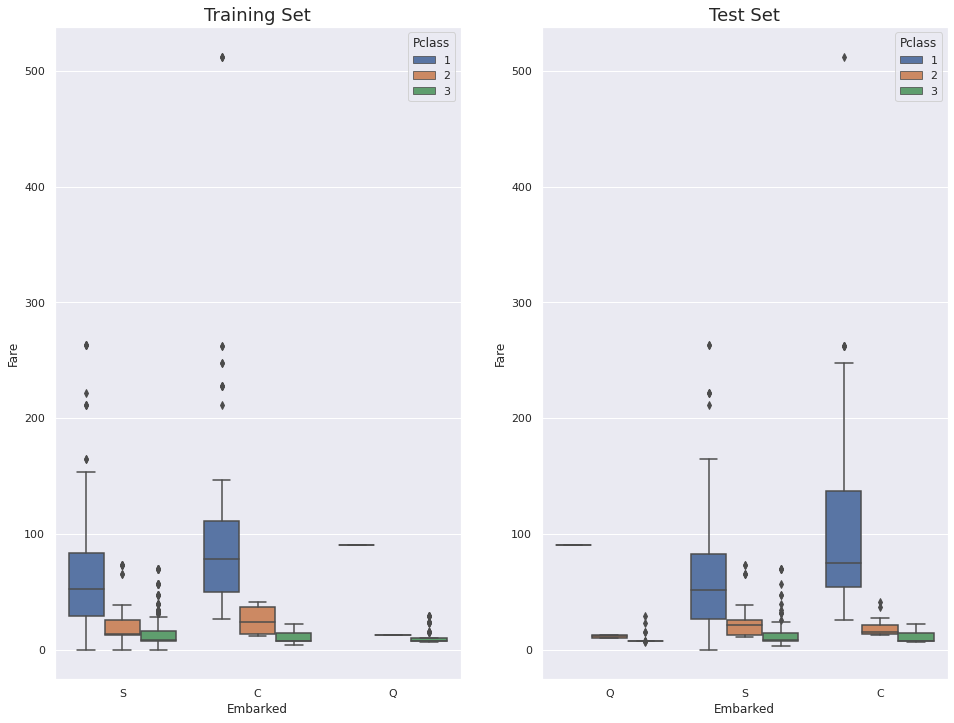

In [263]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=df_train4,ax=ax[0]);
ax2 = sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=df_test,ax = ax[1]);
ax1.set_title('Training Set', fontsize = 18)
ax2.set_title('Test Set', fontsize = 18)

On both the train and test dataset, most of the passengers who paid an average fare of 80$ had type 'C' on the embarked column thus we replace the null values with 'C'

In [264]:
# Replacing the null values in the Embarked column with'C'.
# Creating a copy
df_train5 = df_train4
df_train5.Embarked.fillna('C', inplace=True)

In [265]:
df_train5.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Cabin         9
Embarked      3
dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

### Numerical Columns



#### Age column

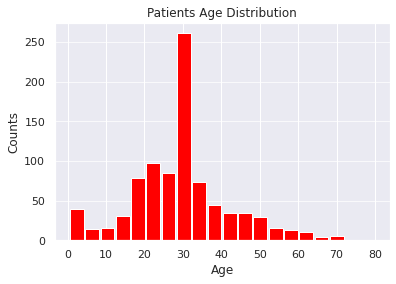

In [266]:
# visualizing age distribution
size, scale = 1000, 10
age = df_train5['Age']

age.hist(grid=True, bins=20, rwidth=0.9, color='red')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

* The didtribution is leptokurtic.
* The Kurtosis is greater than normal which is the effect of replacing the missing values with the mean age.

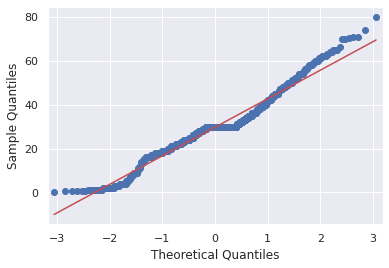

In [267]:
# Normality test
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# generate univariate observations
data = df_train5['Age']

# q-q plot
qqplot(data, line='s')
pyplot.show()

The age follows a normal distribubtion

Text(0.5, 1.0, 'Boxplot for Age')

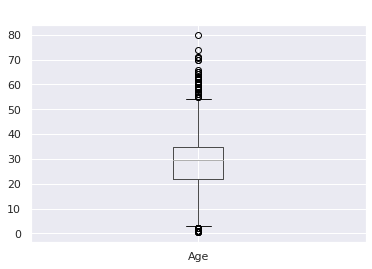

In [268]:
# checking for outliers using a boxplot
df_train5.boxplot(column=['Age'])
plt.title('Boxplot for Age', fontsize=16, color='white')

#### Fare Column

In [269]:
df_train5.Cabin.value_counts()

z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

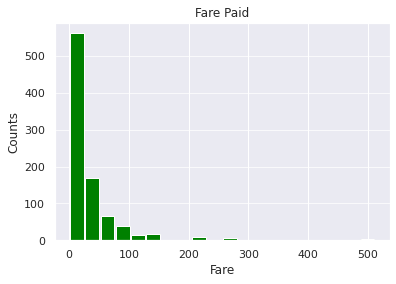

In [270]:
# visualizing fare distribution
size, scale = 1000, 10
age = df_train5['Fare']

age.hist(grid=True, bins=20, rwidth=0.9, color= 'green')
plt.title('Fare Paid')
plt.xlabel('Fare')
plt.ylabel('Counts')
plt.grid(axis='y',alpha=0.75)

* Distribution of the fares paid is right skewed. The highest count is Category 'N' which attributes for 77%.
* This means that 77% of the passengers paid a mean of 19 'units of currency'(pound) for the trip.

### Categorical Columns

#### Cabin Column

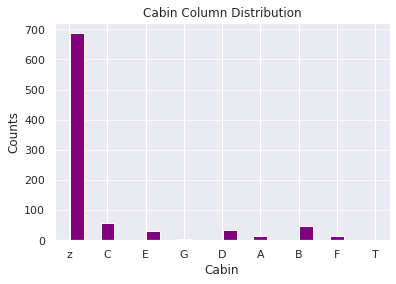

In [271]:
# visualizing Cabin distribution
size, scale = 1000, 10
age = df_train5['Cabin']

age.hist(grid=True, bins=20, rwidth=0.9,color='purple')
plt.title('Cabin Column Distribution')
plt.xlabel('Cabin')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

#### Other Columns

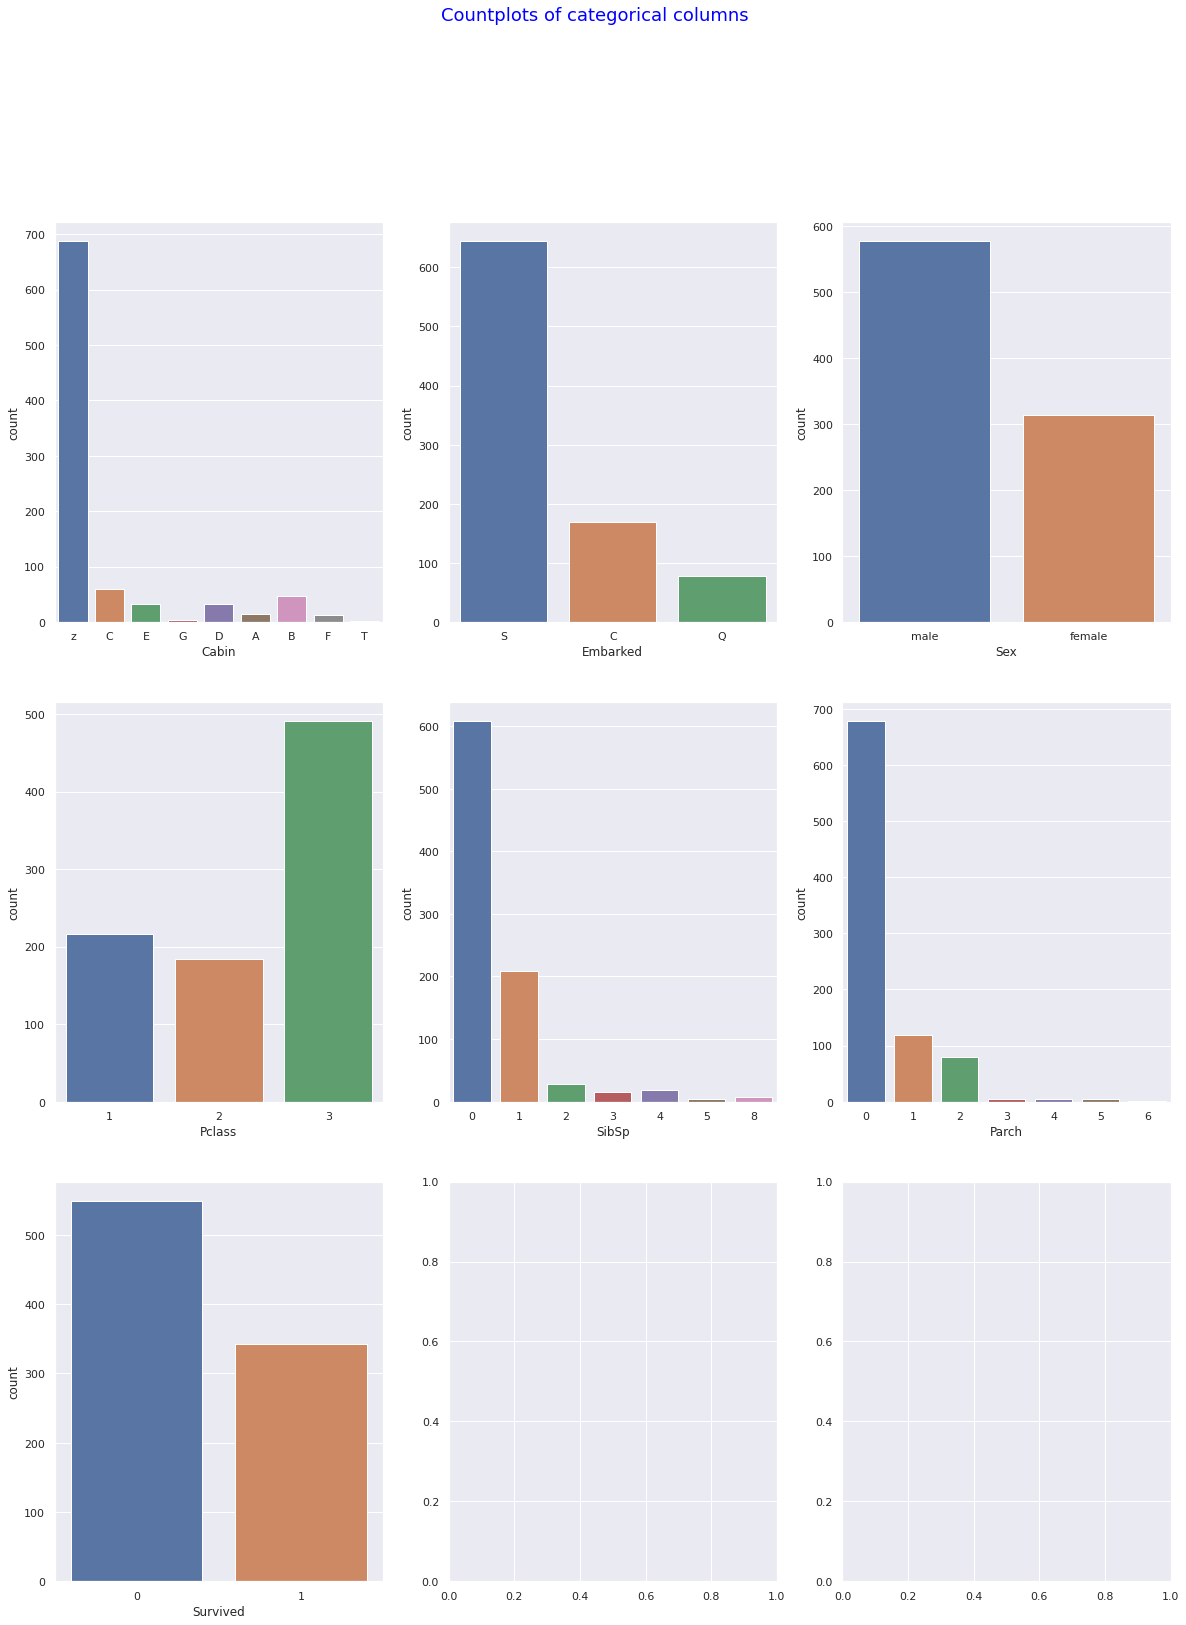

In [272]:
# Countplots of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical_column_1 =  ['Cabin','Embarked','Sex','Pclass','SibSp','Parch', 'Survived']

sns.set(style = 'darkgrid', context = 'notebook')

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(),df_train5,categorical_column_1):
  sns.countplot(df_train5[column],ax=ax)

* There were more males on the ship than females
* Persons who died in the tragedy were more than those who survived
* Most people on the ship did not have family members onboard
* The third class had most people on the ship
*Cabin Z had most occupants

## Bi-variate Analysis

### Gender Vs Survived

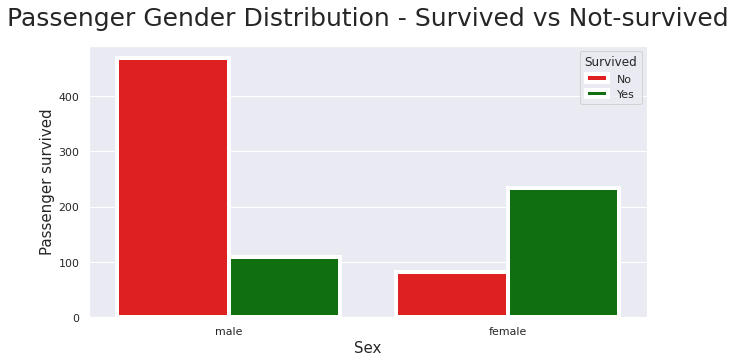

In [273]:
pal = {1:'green', 0:'red'}
sns.set(style='darkgrid')
plt.subplots(figsize = (10,5))
ax = sns.countplot(x = 'Sex', hue='Survived', data=df_train5,linewidth=4,palette=pal)

# fixing title, xlabel and ylabel
plt.title('Passenger Gender Distribution - Survived vs Not-survived',fontsize = 25, pad=20)
plt.xlabel('Sex',fontsize = 15);
plt.ylabel('Passenger survived', fontsize = 15)

# fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs = leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')
plt.show()

* More men died in the tragedy as compared to women. This is because a disproportionate number of men were left aboard because of a 'women and children first' protocol for loading lifeboats.

### Passenger Class Vs Survived

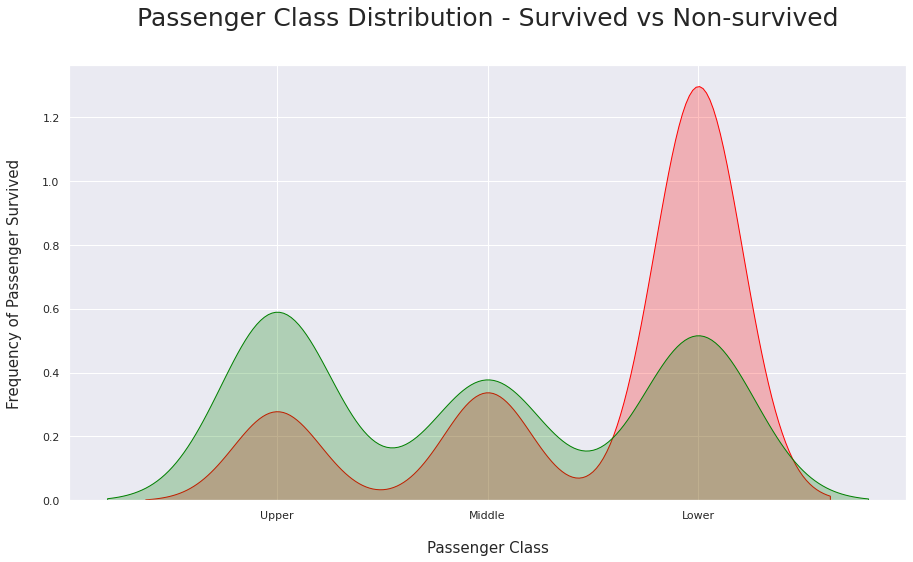

In [274]:
# kernel Density plot
fig = plt.figure(figsize=(15,8))

# used different codes to plot
ax = sns.kdeplot(df_train5.Pclass[df_train5.Survived == 0],color='red',shade=True,label='not survived')
ax = sns.kdeplot(df_train5.loc[(df_train5['Survived']== 1),'Pclass'], color='green',shade=True, label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-survived',fontsize=25,pad=40)
plt.ylabel('Frequency of Passenger Survived', fontsize=15,labelpad=20)
plt.xlabel('Passenger Class', fontsize=15,labelpad=20)

# converting xticks into words for better understanding
labels = ['Upper','Middle','Lower']
plt.xticks(sorted(df_train5.Pclass.unique()),labels);

* In the upper class, those who survived were about twice more than those who died.
* In the middle class, survivors were slightly more than those who died.
* In the lower class, those who died were about thrice as much as those who survived.

### Age Vs Survived

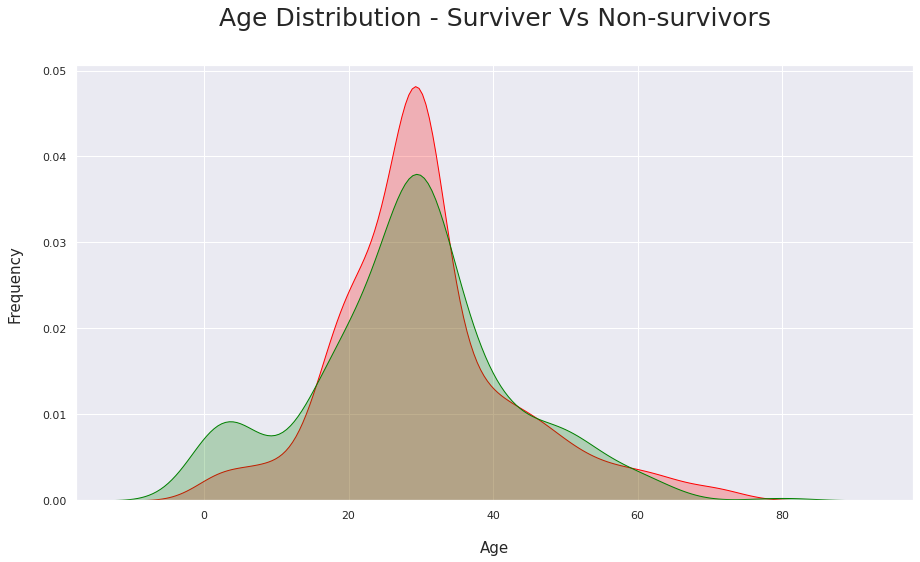

In [275]:
fig = plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train5.loc[(df_train5['Survived']==0),'Age'],color='red',shade=True,label='not survived')
ax = sns.kdeplot(df_train5.loc[(df_train5['Survived']==1),'Age'],color='green',shade=True,label='survived')
plt.title('Age Distribution - Surviver Vs Non-survivors',fontsize=25,pad=40)
plt.xlabel('Age',fontsize=15,labelpad=20)
plt.ylabel('Frequency',fontsize=15,labelpad=20);

* Age distribution and survived distribution curves are fairly similar.

### Correlation

In [276]:
# displaying the correlations between the variables
corr = df_train5.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


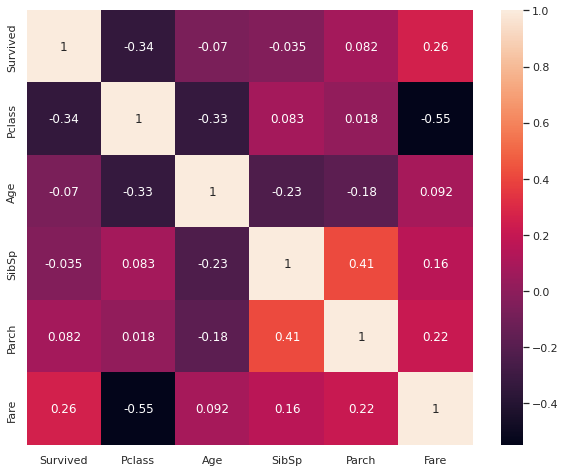

In [277]:
# visualizing the correlation on a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

* The correlations are low which means most of the features are independent.
* The is low multi-collinearity.

# Feature Engineering

## Size of the Family onboard

In [278]:
df_train6 = df_train5
df_train6['family_size'] = df_train6.SibSp + df_train6.Parch+1

In [279]:
def family(size):
  a = ''
  if (size <= 1):
    a = 'alone'
  elif (size <= 4):
    a = 'wee'
  else:
    a = 'big'
  return a

In [280]:
df_train7 = df_train6
df_train7['family'] = df_train7['family_size'].map(family)
df_train7.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family_size,family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,z,S,2,wee
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,2,wee
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,z,S,1,alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,2,wee
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,z,S,1,alone


## Fare Groups

- The fare column gives the total fare paid therfore we need to divide the fare by the family size to obtain the fare paid per person

In [281]:
# Calculating fare based on family size.
# creating a copy
df_train8 = df_train7
df_train8['calculated_fare'] = df_train8.Fare/df_train8.family_size

In [282]:
def fare_group(fare):
  a = ''
  if fare <= 4:
    a = 'Very_low'
  elif fare <= 10:
    a = 'low'
  elif fare <= 20:
    a = 'mid'
  elif fare <= 45:
    a = 'high'
  else:
    a = 'very_high'
  return a

df_train8['fare_group'] = df_train8['calculated_fare'].map(fare_group)
df_train8.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family_size,family,calculated_fare,fare_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,z,S,2,wee,3.62500,Very_low
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,2,wee,35.64165,high
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,z,S,1,alone,7.92500,low
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,2,wee,26.55000,high
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,z,S,1,alone,8.05000,low


## Name

In [283]:
# creating a new column with a
# creating a copy
df_train9 = df_train8
df_train9['name_lenth'] = [len(i)for i in df_train9.Name]

def name_lenght_group(size):
  a = ''
  if (size <= 20):
    a = 'short'
  elif (size <= 35):
    a = 'medium'
  elif (size <= 45):
    a = 'long'
  else:
    a = 'X_long'
  return a

df_train9['nLenght_group'] = df_train9['name_lenth'].map(name_lenght_group)
df_train9.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family_size,family,calculated_fare,fare_group,name_lenth,nLenght_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,z,S,2,wee,3.62500,Very_low,23,medium
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,2,wee,35.64165,high,51,X_long
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,z,S,1,alone,7.92500,low,22,medium
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,2,wee,26.55000,high,44,long
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,z,S,1,alone,8.05000,low,24,medium


In [284]:
df_train9.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'family_size', 'family', 'calculated_fare',
       'fare_group', 'name_lenth', 'nLenght_group'],
      dtype='object')

In [285]:
train = pd.get_dummies(df_train9, columns=['Pclass','Sex','Cabin','Embarked','nLenght_group','family','fare_group'],drop_first=False)
train.drop(['family_size','Name','Fare','name_lenth'],axis=1,inplace=True)

In [286]:
# finding the best principal components
from sklearn.decomposition import PCA
np.random.seed(0)

X = train.drop('Survived', axis=1)
y = train['Survived']

train_features = X

model = PCA(n_components=5).fit(train_features)

# number of components
n_pcs = model.components_.shape[0]

# get the index of the most important feature on each component
# list comprehension here
most_important = [np.abs(model.components_[i]).argmax()for i in range(n_pcs)]
initial_faeture_names = ['Age','SibSp','Parch','calculated_fare','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Cabin_A','Cabin_B','Cabin_C','Cabin_D','Cabin_E','Cabin_F','Cabin_G','Cabin_N','Cabin_T','Embarked_C','Embarked_Q','Embarked_S','nLength_group_X_long','nLenght_group_long','nLenght_group_medium','nLenght_group_short','family_alone','family_big','family_wee','fare_group_Very_low','fare_group_high','fare_group_low','fare_group_mid','fare_group_very_high']

# get the names
most_important_names = [initial_faeture_names[most_important[i]]for i in range(n_pcs)]

# list comprehension here again 
dic = {'PC{}'.format(i): most_important_names[i]for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,calculated_fare
1,PC1,Age
2,PC2,SibSp
3,PC3,Pclass_3
4,PC4,Parch


In [287]:
model.explained_variance_ratio_

array([8.83199985e-01, 1.13295000e-01, 1.04727768e-03, 4.72848757e-04,
       3.66893778e-04])

In [288]:
X.head()

,Age,SibSp,Parch,calculated_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_z,Embarked_C,Embarked_Q,Embarked_S,nLenght_group_X_long,nLenght_group_long,nLenght_group_medium,nLenght_group_short,family_alone,family_big,family_wee,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,22.0,1,0,3.62500,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0
1,38.0,1,0,35.64165,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,26.0,0,0,7.92500,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
3,35.0,1,0,26.55000,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
4,35.0,0,0,8.05000,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0


# Modelling

## Baseline Model: Logistic Regression

In [289]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [290]:
# import LogisticRegression model in python
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

# call on the model object
logreg = LogisticRegression(solver='liblinear')

# fit the model with 'train_x' and 'train_y'
logreg.fit(X_train,y_train)

# Once the model is trained we want to find out how well the model is performing, so we test the model.
# we use 'test_x' portion of the data(this data was not used to fit the model) to predict model outcome.
y_pred = logreg.predict(X_test)

# Once predicted we save that outcome in 'y_pred' variable
# Then we compare the predicted value('y_pred') and actual value ('test_y') to see how well our model is performing.
print('The accuracy Score is: {}'.format(round(accuracy_score(y_pred, y_test),5)))


The accuracy Score is: 0.80447


In [291]:
print(confusion_matrix(y_test,y_pred))

[[97 11]
 [24 47]]


* The baseline model has an accuracy of 80%
* Confusion Matrix Summary
    * True positive : 97
    * True negative : 47
    * False positive : 11
    * False negative : 24

## KNN: K-Nearest Neighbor

### Approach 1: 80 - 20 split

In [292]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)


In [293]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [294]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [295]:
# the final step is to make predictions on our test data
y_pred = classifier.predict(X_test)


In [296]:
# Evaluating the algorithm
# For evaluating an algorithm, confusion matrix, precision, recal;and f1 score are the most commonly used metrics
# The confusion_metrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.64      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



In [297]:
accuracy_score(y_test,y_pred)

0.7988826815642458

In [298]:
print(confusion_matrix(y_test, y_pred))

[[99 11]
 [25 44]]


* The KNN model with split 80-20 has an accuracy of 79.89%
* Confusion Matrix Summary
    * True positive : 99
    * True negative : 45
    * False positive : 11
    * False negative : 25

### Approach 2: 70 - 30 split

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=0)

In [300]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [301]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [302]:
# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)


In [303]:
# Evaluating our algorithm
# For evaluating an algorithm, confusion matrix, precision, recall and f1scare are the most commonly used metrics.
# the confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics.

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       168
           1       0.80      0.63      0.70       100

    accuracy                           0.80       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268



In [304]:
accuracy_score(y_test,y_pred)

0.8022388059701493

In [305]:
print(confusion_matrix(y_test,y_pred))

[[152  16]
 [ 37  63]]


* The KNN model split of 70 - 30 has an accuracy of 70%
* Confusion Matrix Summary
    * True positive : 140
    * True negative : 48
    * False positive : 28
    * False negative : 52

### Approach 3: 60 - 40 split

In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size= 0.40, random_state=0)

In [307]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [308]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [309]:
# the final step is to make prediction on our test data
y_pred = classifier.predict(X_test)


In [310]:
# evaluating the algorithm
# for evaluating an algorithm, confusion matrix,precision, recall and f1 score are the most commonly used metrics
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics.
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       221
           1       0.75      0.63      0.69       136

    accuracy                           0.78       357
   macro avg       0.77      0.75      0.76       357
weighted avg       0.78      0.78      0.77       357



In [311]:
accuracy_score(y_test,y_pred)

0.7787114845938375

In [312]:
print(confusion_matrix(y_test,y_pred))

[[192  29]
 [ 50  86]]


* The KNN model with a split of 60 - 40 has an accuracy 77.87%
* Confusion Matrix Summary
    * True positive : 192
    * True negative : 86
    * False positive : 29
    * False negative : 50

## Naive Bayes

In [313]:
# Splitting our data into a training set and a test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=6)

In [314]:
# Training our model
clf = GaussianNB()
model = clf.fit(X_train,y_train)

In [315]:
# predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))


0.7798507462686567


* The Naive Bayes model has an acuracy of 77.99%

# Challenging the solution: Dimensionality Reduction

## Approach 1: 5 Principal Components

KNN and Naive Bayes Models using 5 Principal Components

In [316]:
df

,0,1
0,PC0,calculated_fare
1,PC1,Age
2,PC2,SibSp
3,PC3,Pclass_3
4,PC4,Parch


In [317]:
# reviewing the solution
# modelling using the first 5 principal components
X1 = X[['Age','SibSp','Parch','calculated_fare','Pclass_3']]
X1.head()

,Age,SibSp,Parch,calculated_fare,Pclass_3
0,22.0,1,0,3.62500,1
1,38.0,1,0,35.64165,0
2,26.0,0,0,7.92500,1
3,35.0,1,0,26.55000,0
4,35.0,0,0,8.05000,1


### KNN

In [318]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=6)

In [319]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [320]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [321]:
y_pred = classifier.predict(X_test)

In [322]:
# evaluating the algorithm
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       113
           1       0.71      0.61      0.66        66

    accuracy                           0.77       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.76      0.77      0.76       179



In [323]:
accuracy_score(y_test,y_pred)

0.7653631284916201

In [324]:
print(confusion_matrix(y_test,y_pred))

[[97 16]
 [26 40]]


* The KNN model has an accuracy of 76.5%
* Confusion Matrix Summary
    * True positive: 97
    * True negative: 40
    * False positive: 16
    * False negative: 26

## Approach 2: LDA

In [325]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split

A_train,A_test,b_train,b_test = train_test_split(X,y,test_size=.2,random_state=0)


In [326]:
# normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [327]:
# performing LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
A_train = lda.fit_transform(A_train,b_train)
A_test = lda.transform(A_test)

In [328]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(A_train,b_train)
b_pred = classifier.predict(A_test)


In [329]:
# Evaluating the performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(b_test,b_pred))

print('Accuracy' + str(accuracy_score(b_test,b_pred)))

[[97 13]
 [19 50]]
Accuracy0.8212290502793296


* LDA modelhas an accuracy of 82%
* Confusion Matrix Summary
    * True positive : 97
    * True negative : 50
    * False positive : 13
    * False negative : 19

* Modelling Accuracy Score Summary

   * Logistic Regression : 80%
   * KNN                 : 70% (using the 70 - 30 split)
   * After PCA           : 76.5%
   * Naive Bayes         : 77.99%
   * LDA                 : 82%

* The best predictor is the LDA model followed by the baseline model: Logistic Regressor.

# Follow up questions

At this point, we can refine our question or collect new data. All in an iterative process to get to the truth.

 a). Did we have the right data?
   * Yes, the data was sufficient and the features were useful in modelling.
   * The models above achieved almost the same accuracy levels which means that the data is good for training


b). Do we need other data to answer our question?
* More Feature Engineering may be done to uncover more patterns in the data that may improve the model accuracy.

c). Did we have the right question?
* Yes, predicting survival based on past disasters helps us understand panic psychology and what to anticipate incase disaster strikes in future